### Regression Exercise 
# Moneyball The NBA
---

### This HW is not easy. TRY IT YOURSELF FIRST! 
Then If you are able to complete it, [watch this lecture series on it](https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/pages/linear-regression/playing-moneyball-in-the-nba-recitation/video-1-the-data/). 

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.api import qqplot

import CTPLIB as ctp


# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/NBA_test.csv and data/NBA_train.csv`

In [3]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/NBA_train.csv')


# DISPLAY THE FIRST 5 ROWS
df.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


```
SeasonEnd: Year season ended
Team: Name of team
Playoffs: If they made the playoffs. 1 == made to playoffs
W: Number of regular season in that season. 
PTS: Points scored in regular season. 
oppPTS: Opponent Points scored in regular season. 
FG: Field Goals made (total shots made == 2P and 3P combined)
FGA: Field Goals attempted (total shots attempted == 2P and 3P combined)
2P: two-pointers made
2PA: two-pointers attempted
3P: three-pointers made
3PA: three-pointers attempted
FT: Free-Throws made (not included in FG stat)
FTA: Free-Throws attempted (not included in FG stat)
ORB: Offensive Rebounds
DRB: Defensive Rebounds
AST: Assists made
STL: Steals 
BLK: Blocks 
TOV: Turnovers 
```

#### Inspect our data using `df.describe()` function.

In [5]:
# Inspect our data using `df.describe()` function.
df.describe().round(2)

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00,835.00
mean,1996.32,0.57,41.00,8370.24,8370.24,3200.37,6873.32,2881.32,5956.44,319.04,916.87,1650.46,2189.95,1061.58,2427.35,1912.11,668.36,419.81,1302.84
std,9.24,0.49,12.74,581.04,587.54,287.18,401.03,446.10,830.60,199.70,523.98,197.65,244.49,150.22,130.67,221.61,93.39,82.27,153.97
min,1980.00,0.00,11.00,6901.00,6909.00,2565.00,5972.00,1981.00,4153.00,10.00,75.00,1189.00,1475.00,639.00,2044.00,1423.00,455.00,204.00,931.00
25%,1989.00,0.00,31.00,7934.00,7934.00,2974.00,6563.50,2510.00,5269.00,131.50,413.00,1502.50,2008.00,953.50,2346.50,1735.00,599.00,359.00,1192.00
50%,1996.00,1.00,42.00,8312.00,8365.00,3150.00,6831.00,2718.00,5706.00,329.00,942.00,1628.00,2176.00,1055.00,2433.00,1899.00,658.00,410.00,1289.00
75%,2005.00,1.00,50.50,8784.50,8768.50,3434.50,7157.00,3296.00,6753.50,481.50,1347.50,1781.00,2352.00,1167.00,2516.50,2077.50,729.00,469.50,1395.50
max,2011.00,1.00,72.00,10371.00,10723.00,3980.00,8868.00,3954.00,7873.00,841.00,2284.00,2388.00,3051.00,1520.00,2753.00,2575.00,1053.00,716.00,1873.00


#### Check for Nulls.

In [6]:
# Check for Nulls.
df.isnull().sum()

SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64

#### Check for Duplicates

In [9]:
# Check for Duplicates
df.duplicated().any()

False

#### Build a function that will INSPECT ANY DATAFRAME FOR YOU do this for you for any data frame you pass into it.

In [13]:
def inspect_dataframe(input_df):
    describe_df = input_df.describe().round(2)
    null_checks = input_df.isnull().sum()
    is_duplicates = input_df.duplicated().any()
    print(f"describe data: \n {describe_df} \n")
    print(f"count_null: \n {null_checks} \n")
    print(f"Are there duplicates: \n {is_duplicates} \n")
    return "That gooood stuff."

inspect_dataframe(df)


describe data: 
        SeasonEnd  Playoffs       W       PTS    oppPTS       FG      FGA  \
count     835.00    835.00  835.00    835.00    835.00   835.00   835.00   
mean     1996.32      0.57   41.00   8370.24   8370.24  3200.37  6873.32   
std         9.24      0.49   12.74    581.04    587.54   287.18   401.03   
min      1980.00      0.00   11.00   6901.00   6909.00  2565.00  5972.00   
25%      1989.00      0.00   31.00   7934.00   7934.00  2974.00  6563.50   
50%      1996.00      1.00   42.00   8312.00   8365.00  3150.00  6831.00   
75%      2005.00      1.00   50.50   8784.50   8768.50  3434.50  7157.00   
max      2011.00      1.00   72.00  10371.00  10723.00  3980.00  8868.00   

            2P      2PA      3P      3PA       FT      FTA      ORB      DRB  \
count   835.00   835.00  835.00   835.00   835.00   835.00   835.00   835.00   
mean   2881.32  5956.44  319.04   916.87  1650.46  2189.95  1061.58  2427.35   
std     446.10   830.60  199.70   523.98   197.65   244.49

'That gooood stuff.'

#### Get a sense of how many wins it will take to make the playoffs. 
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

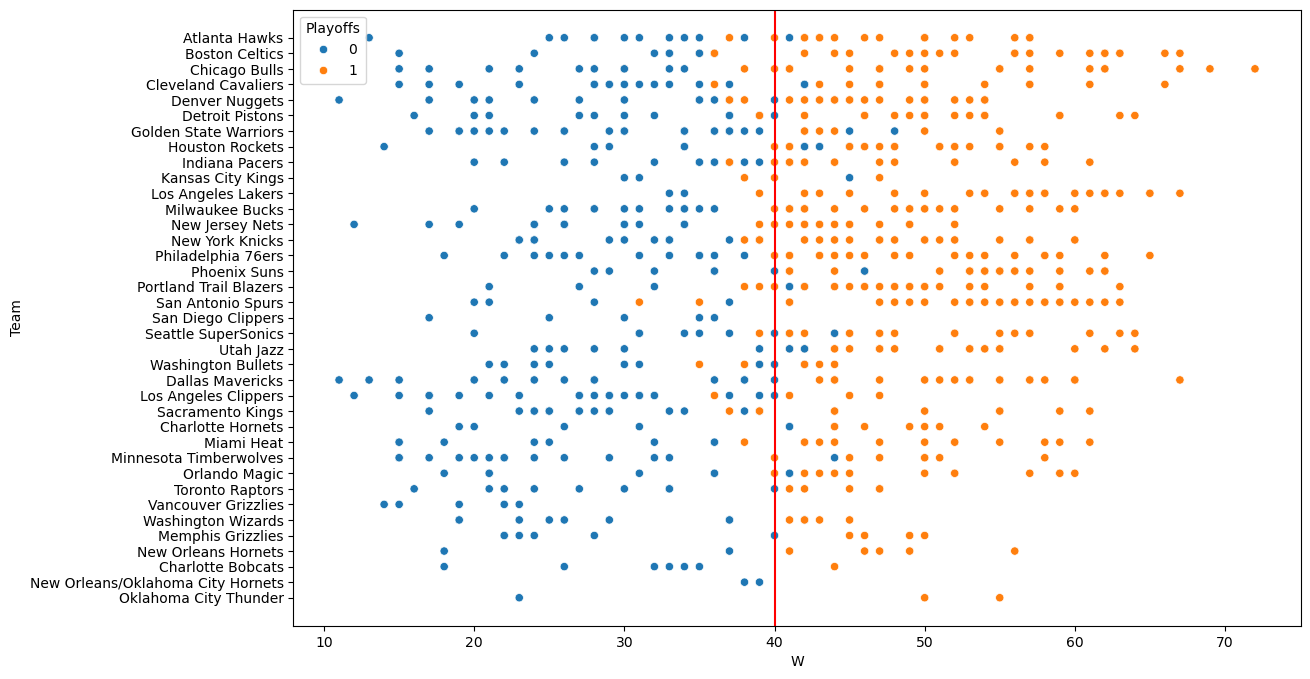

In [17]:
plt.figure(figsize=(13,8))
ax = sns.scatterplot(df, x='W', y='Team', hue='Playoffs')
ax.axvline(x=40, color='red')

#### Take a rough estimate, and now use that moving forward.  



In [90]:
WINS_NEED_TO_MAKE_PLAYOFFS = 40

---

# Now do moneyball but for the NBA. 

#### I would like you to do try and do this on your own first.  

It's not easy, but its fun af.  

There is a guided lecture on how to do this that I can send you, but I'd like for you to try and figure it out on your own first.  

If you are fully stuck, ask in slack how other people did it if that doesn't work (I highly encourage collorbration and learning from eachother.  I still consider that doing it on your own.)  

If that doesn't work, DM me and I will send you the lectures explaining how to do the whole thing.

# Rough Guide a v1 model.
0. Make a model to predict PTS 
0. For v1, dont use `2P, 3P, FG, or FT`.  Instead use `2PA, 3PA, FTA`.  
0. Include any other cols use see fit.  


In [22]:
def evaluate_regression(independent_variables, dependent_variables, df):
    X = df[independent_variables]
    y = df[dependent_variables]

    X = sm.add_constant(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

    model = sm.OLS(y_train, X_train).fit()

    print(model.summary())

    y_pred = model.predict(X_test)

    r_squared = metrics.r2_score(y_test, y_pred).round(2)

    model_root_mean_squared_error = rmse(y_test, y_pred).round(3)

    print('R-Squared Score:', r_squared)
    print('RMSE:', model_root_mean_squared_error)

    return None
    


In [23]:
independent_variables = ['2PA', '3PA', 'FTA']
dependent_variables = 'PTS'

evaluate_regression(independent_variables, dependent_variables, df)


                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     792.7
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          6.46e-219
Time:                        01:17:54   Log-Likelihood:                -4685.2
No. Observations:                 668   AIC:                             9378.
Df Residuals:                     664   BIC:                             9397.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1258.4354    261.495     -4.812      0.0

In [24]:
independent_variables = ['2PA', '3PA', 'FTA', 'AST']
dependent_variables = 'PTS'

evaluate_regression(independent_variables, dependent_variables, df)



                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1119.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          4.37e-293
Time:                        01:22:07   Log-Likelihood:                -4509.6
No. Observations:                 668   AIC:                             9029.
Df Residuals:                     663   BIC:                             9052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1471.2908    201.437     -7.304      0.0